In [2]:
import os, pandas as pd, numpy as np
from ROOT import TH1D, TCanvas, TFile
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set()
print(os.listdir('/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData'))
#1572097505

['1571922014.root', '1571906097.root', '1572200730.root', '1572182574.root', '1571935652.root', '1572006850.root', '1572013337.root', '1571925880.root', '1571668179.root', '1571823752.root', '1571928699.root', '1571765494.root', '1572199006.root', '1572188327.root', '1572193711.root', '1571906955.root', '1572185366.root', '1572089902.root', '1572167578.root', '1572094221.root', '1572095989.root', '1572104678.root', '1571676993.root', '1572007834.root', '1572012923.root', '.sys.a#.v#1571934315.root.93c095a0-06f1-11ea-870e-a4bf0112db74', '1571931737.root', '1572101517.root', '1572103468.root', '1572012186.root', '1572206843.root', '1571934315.root', '1572199259.root', '1572089109.root', '1572196640.root', '1571824778.root', '1571913030.root', '1571908717.root', '1572005872.root', '1571824140.root', '1571920030.root', '1571937854.root', '1572173990.root', '1572172623.root', '.sys.a#.v#1572106243.root.ab00f8cc-06f1-11ea-a11e-a4bf0112db74', '1572190135.root', '1571950010.root', '1572095620.

In [2]:
os.path.exists('/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572002868.root')

True

In [3]:
class Event:
    
    def __init__ (self, event):
        self.event = event
        
    def get_branch_value (self, branch):
        return getattr(self.event, branch)
    
class Calibration:
    
    def __init__ (self, main_ttree, test_detector_ttree, fixed_detector_ttree):
        self.main_ttree = main_ttree
        self.test_detector_ttree = test_detector_ttree
        self.fixed_detector_ttree = fixed_detector_ttree
        
    def calculate_offset (self):
        
        clusterX_dict = {}
        clusterY_dict = {}
        clusterZ_dict = {}
        
        for i in range(2):
            clusterX_dict[i] = []
            clusterY_dict[i] = []
            clusterY_dict[i] = []
        
        for e in self.main_ttree:
            event = Event(e)
            print(e.alpide_51_pos_x)
            '''
            clusterX_dict[0] = event.get_branch_value(self.test_detector_ttree)
            clusterY_dict[0] = event.get_branch_value(self.test_detector_ttree)
            clusterZ_dict[0] = event.get_branch_value(self.test_detector_ttree)
            
            clusterX_dict[1] = event.get_branch_value(self.fixed_detector_ttree)
            clusterY_dict[1] = event.get_branch_value(self.fixed_detector_ttree)
            clusterZ_dict[1] = event.get_branch_value(self.fixed_detector_ttree)
               ''' 
       
        diff = [a-b for a,b in zip(clusterX_dict[0], clusterX_dict[1])]
            
        mean_x = np.array(diff_x).mean()
            
        print('offset between ' + self.test_detector_ttree + ' and 55 =' + str(mean_x))
    

In [4]:
class Cluster:
    def __init__(self, pixels_list):
        self.x = 0
        self.y = 0
        self.pixels_list = pixels_list
        
    def calc_center(self):
        sum_x = 0
        sum_y = 0
        for (i,j) in self.pixels_list:
            sum_x += i
            sum_y += j
            
        self.x = sum_x / len(self.pixels_list)
        self.y = sum_y / len(self.pixels_list)
        
        self.x = (self.x - 576) * 2.11968 /1152
        self.y = (self.y - 288) * 1.05984 /576
        
        return (self.x, self.y)
    
    def print(self):
        print(self.pixels_list)
    
    def add(self, pixel):
        self.pixels_list.append(pixel)
        
class ClusterAlgorithm:
        
    def calc_clusters(self, pixels_listX, pixels_listY):
        cluster_list = []
        
        pixels_list = list(map(lambda x, y:(x,y), pixels_listX, pixels_listY))
        pixels_to_check = list(map(lambda x, y:(x,y), pixels_listX, pixels_listY)) 
        
        for pixel in pixels_list:
            #Remove current pixel from pixels_to_check list in order to compare all other pixels
            if pixel in pixels_to_check:
                pixels_to_check.remove(pixel)
            else:
                continue
            
            #Determine if current pixel can fit into existing cluster
            #If so, return the cluster
            found_cluster, cluster = self.has_cluster(cluster_list, pixel)
            
            if found_cluster:
                #Add pixel to existing cluster
                cluster_list[cluster_list.index(cluster)].add(pixel)
            else:
                #Create new cluster from pixel
                c = Cluster([pixel])
                for pixel_unchecked in pixels_to_check:
                    #Add remaining pixels to cluster if they are direct neighbors with current pixel
                    if self.are_neighbors(pixel_unchecked, pixel):
                        c.add(pixel_unchecked)
                        pixels_to_check.remove(pixel_unchecked)
                cluster_list.append(c)
        
        cluster_centers = []
        for cluster in cluster_list:
            cluster_centers.append(cluster.calc_center())
        
        return cluster_centers
         
    def are_neighbors(self, pixel1, pixel2):
        if abs(pixel1[0] - pixel2[0]) <= 1 and abs(pixel1[1] - pixel2[1]) <= 1:
            return True
        else:
            return False
            
    def has_cluster(self, cluster_list, pixel):
        for cluster in cluster_list:
            for p in cluster.pixels_list:
                if self.are_neighbors(pixel, p):
                    return True, cluster
        return False, None
    
pixels_list = [(1,1), (2,1), (3,1), (4,1), (5,1), (2,2), (6,5), (6,6), (7,6), (7,5), (8,5), (10, 10)]
pixels_listX = [374, 882, 447, 448, 30, 497, 431, 432]
pixels_listY = [14, 158, 285, 285, 344, 114, 154, 154]
cluster_algo = ClusterAlgorithm()

f = cluster_algo.calc_clusters(pixels_listX, pixels_listY)

print(f)

[(-0.37167999999999995, -0.5041599999999999), (0.56304, -0.23919999999999997), (-0.23643999999999998, -0.00552), (-1.0046399999999998, 0.10303999999999999), (-0.14536, -0.32015999999999994), (-0.26587999999999995, -0.24655999999999997)]


In [5]:
class RootFile:
    
    def __init__(self, file_name, options):
        self.tfile = TFile(file_name, options)
        
    def print_trees(self):
        self.tfile.ls()
        
    def print_branches_in_tree(self, ttree):
        self.tfile.Get(ttree).Print()
        
    def load_to_dataframe(self, _ttree='', branches=None):
        
        ttree = self.tfile.Get(_ttree)
        counter = 0
        
        branches_list = []
        if branches is None:
            for tbranch in ttree.GetListOfBranches():
                branches_list.append(str(tbranch).split()[1])
        else:
            branches_list = branches
        
        df = pd.DataFrame(columns=branches_list)
            
        
        for branch_str in branches_list:
            
            data_list = []
            
            for event in ttree:
                data_list.append(getattr(event, branch_str))
            df[branch_str] = data_list
            
        return df
    
    def branch_to_nparray(self, _ttree, branch):
        ttree = self.tfile.Get(_ttree)
        data_list = []
        for event in ttree:
            data_list.append(getattr(event, branch))
        
        arr = np.array(data_list)
      
        return data_list
    
    def get_tree(self, ttree_name):
        return self.tfile.Get(ttree_name)
   
    def cluster(self, dataframe, branch_list=[]):
        cluster_df = pd.DataFrame(columns=branch_list)
        for branch in branch_list:
            cluster_list = []
            for cluster in dataframe[branch]:
                total = 0
                counter = 0
                for i in cluster:
                    total += i
                    counter += 1
                avg = total/counter if counter is not 0 else 0
                cluster_list.append(avg)
            cluster_df[branch] = cluster_list     
            
        return cluster_df

In [6]:
class Histogram:
    
    def __init__(self, detector_ttree, detector_tbranch_list=[], canvas_division = (),
                 bins=0, x_min=0, x_max=0):
        self.detector_ttree = detector_ttree
        self.detector_tbranch_list = detector_tbranch_list
        self.canvas_division = canvas_division
        self.bins = bins
        self.x_min = x_min
        self.x_max = x_max
    
    def root_histogram(self):
        hist = TH1D('hist', '', self.bins, self.x_min, self.x_max)
        canvas = TCanvas('canvas', 'canvas', 800, 600)
        canvas.Divide(self.canvas_division[0], self.canvas_division[1])
        counter = 1
        num_divisions = self.canvas_division[0] * self.canvas_division[1]
        
        for tbranch in self.detector_tbranch_list:
            canvas.cd(counter)
            self.detector_ttree.Draw(tbranch+'>>hist')
            print(tbranch)
            counter += 1
        
        canvas.Draw()
        hist.Draw()

        return canvas, hist
    
    def draw_branch_histograms(self):
        canvas = TCanvas('canvas', 'canvas', 800, 600)
        canvas.Divide(self.canvas_division[0], self.canvas_division[1])
        counter = 1
        for branch in self.detector_tbranch_list:
            canvas.cd(counter)
            self.detector_ttree.Draw(branch)
            counter += 1
        canvas.Draw()
        return canvas
    
    def set_branches(self, branch_list):
        self.detector_tbranch_list = branch_list

In [7]:
file = RootFile('/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572179299.root', 'READ')

In [8]:
file.print_trees()
file.print_branches_in_tree('RAWdata')

TFile**		/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572179299.root	
 TFile*		/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572179299.root	
  KEY: TTree	RAWdata;2	BL4S RAW data tree
  KEY: TTree	RAWdata;1	BL4S RAW data tree
  KEY: TTree	RECOdata;2	BL4S RECO data tree
  KEY: TTree	RECOdata;1	BL4S RECO data tree
******************************************************************************
*Tree    :RAWdata   : BL4S RAW data tree                                     *
*Entries :   200496 : Total =       179947552 bytes  File  Size =   40851327 *
*        :          : Tree compression factor =   4.41                       *
******************************************************************************
*Br    0 :QDC0_ch0  : QDC0_ch0/i                                             *
*Entries :   200496 : Total  Size=     804261 bytes  File Size  =     460005 *
*Baskets :       20 : Basket Size=     674304 bytes  Compression=   1.75     *
*.............................

In [9]:
file.print_branches_in_tree('RECOdata')

******************************************************************************
*Tree    :RECOdata  : BL4S RECO data tree                                    *
*Entries :   200496 : Total =        81752831 bytes  File  Size =   34682184 *
*        :          : Tree compression factor =   2.36                       *
******************************************************************************
*Br    0 :NChamber1_position :                                               *
*         | UInt_t Number of entries in branch Chamber1_position             *
*Entries :   200496 : Total  Size=     804873 bytes  File Size  =     101180 *
*Baskets :       23 : Basket Size=     747008 bytes  Compression=   7.95     *
*............................................................................*
*Br    1 :Chamber1_position :                                                *
*         | Double_t Local position of Chamber1 clusters in cm               *
*Entries :   200496 : Total  Size=    1525846 bytes 

In [10]:
scint = file.load_to_dataframe('RAWdata', ['QDC0_ch0'])

In [33]:
chamber2 = file.load_to_dataframe('RECOdata', ['Chamber2_position'])
chamber3 = file.load_to_dataframe('RECOdata', ['Chamber3_position'])

In [32]:
chamber2

,Chamber2_position
0,[]
1,"[6.592499999999999, 1.6875, 9.675541117145075]"
2,"[6.592499999999999, 1.6875, 9.675541117145075,..."
3,[6.592499999999999]
4,[6.592499999999999]
...,...
110662,[6.592499999999999]
110663,[]
110664,[6.592499999999999]
110665,[6.592499999999999]


In [37]:
chamber3['Chamber3_position'][0]

IndexError: buffer index out of range

In [22]:
mimX.tolist()[0][0]

-0.03496

In [22]:
print(mimosaY['Mimosa1_yPosition'][0])

<Double_t buffer, size 5>


In [17]:
x = scint['QDC0_ch0']

In [40]:
x_cleaned_moyal = x[x.between(x.quantile(.05), x.quantile(.90))]

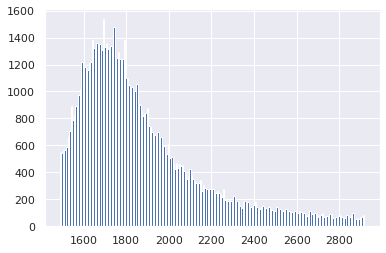

In [41]:
x_cleaned_moyal.hist(bins=200)

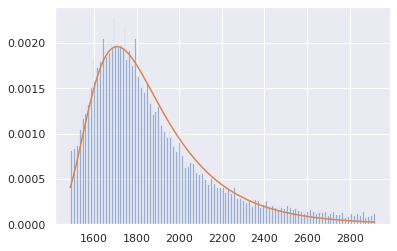

In [42]:
_, bins, _ = plt.hist(x_cleaned_moyal, 200, density=1, alpha=.5)
mu_moyal, sigma_moyal = scipy.stats.moyal.fit(x_cleaned_moyal)
best_fit_line = scipy.stats.moyal.pdf(bins, mu_moyal, sigma_moyal)
plt.plot(bins, best_fit_line)
plt.show()

In [47]:
x_cleaned_moyal

1         1966
2         1861
4         1947
5         1529
6         2255
          ... 
110662    1805
110663    1848
110664    1791
110665    2214
110666    1709
Name: QDC0_ch0, Length: 94119, dtype: int64

In [18]:
x[0]

105

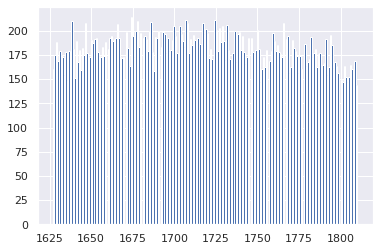

In [34]:
x_cleaned_norm = x[x.between(x.quantile(.20), x.quantile(.50))]
x_cleaned_norm.hist(bins=200)

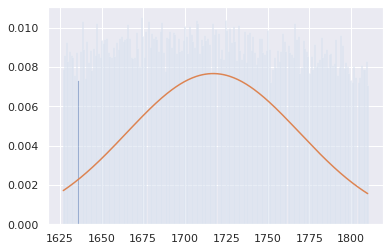

In [135]:
_, bins, _ = plt.hist(x_cleaned_norm, 300, density=1, alpha=0.5)
mu_norm, sigma_norm = scipy.stats.norm.fit(x_cleaned_norm)
best_fit_line = scipy.stats.norm.pdf(bins, mu_norm, sigma_norm)
plt.plot(bins, best_fit_line)
plt.show()

In [136]:
mu_norm, sigma_norm

(1717.1111644513787, 52.072387437398866)

In [43]:
mu_moyal, sigma_moyal

(1708.6278207591558, 123.37252756687286)

In [25]:
size=200

x = pd.Series(np.random.normal(size=size)) # 200 values
x = x[x.between(x.quantile(.15), x.quantile(.85))] # without outliers

print(x) # Now only 140 values

2     -0.156993
3      0.512809
4     -0.824491
5     -0.783255
6      0.297251
         ...   
194   -0.779661
195   -0.227735
197    0.874781
198   -0.083158
199    1.024067
Length: 140, dtype: float64


In [16]:
mimosa0_reco = file.load_to_dataframe('RECOdata', ['Mimosa0_xPosition', 'Mimosa0_yPosition'])

In [51]:
test_df = mimosa0_reco.apply(lambda x: [i for i in x[0]], axis=1)

In [52]:
test_df

0         [-0.2852, -0.29072000000000003, -0.7452, -0.18...
1         [-0.2852, -0.29072000000000003, -0.7452, -0.18...
2         [-0.2852, -0.29072000000000003, -0.7452, -0.18...
3         [-0.2852, -0.29072000000000003, -0.7452, -0.18...
4                  [-0.2852, -0.29072000000000003, -0.7452]
                                ...                        
100892    [-0.2852, -0.29072000000000003, -0.7452, -0.18...
100893    [-0.2852, -0.29072000000000003, -0.7452, -0.18...
100894    [-0.2852, -0.29072000000000003, -0.7452, -0.18...
100895                      [-0.2852, -0.29072000000000003]
100896    [-0.2852, -0.29072000000000003, -0.7452, -0.18...
Length: 100897, dtype: object

In [42]:
clusterAlgo = ClusterAlgorithm()
mimosa0_reco_test = pd.DataFrame()
mimosa0_reco_test['xyPosition'] = mimosa0.apply(lambda x: clusterAlgo.calc_clusters(x['Mimosa0_hitX'], x['Mimosa0_hitY']), axis=1)

In [43]:
for i in range(20):
    print(i, ':', [(round(x, 6), round(y, 6)) for (x,y) in mimosa0_reco_test['xyPosition'][i]])

0 : [(0.64952, -0.49312), (-0.16192, -0.25208), (1.00096, -0.46552)]
1 : [(0.64952, -0.49312), (-0.16192, -0.25208), (1.00096, -0.46552), (0.07452, -0.05336)]
2 : [(0.64952, -0.49312), (-0.16192, -0.25208), (1.00096, -0.46552), (0.07452, -0.05336), (0.39376, 0.28152), (-0.56488, -0.1656), (-0.76912, -0.27048), (-0.317707, 0.006747), (0.28336, 0.02392), (0.35696, -0.2392)]
3 : [(0.64952, -0.49312), (-0.16192, -0.25208), (1.00096, -0.46552), (0.07452, -0.05336), (0.39376, 0.28152), (-0.56488, -0.1656), (-0.76912, -0.27048), (-0.317707, 0.006747), (0.28336, 0.02392), (0.35696, -0.2392)]
4 : [(0.64952, -0.49312), (-0.16192, -0.25208)]
5 : [(0.64952, -0.49312), (-0.16192, -0.25208), (1.00096, -0.46552), (0.07452, -0.05336), (0.39376, 0.28152), (-0.56488, -0.1656), (-0.76912, -0.27048), (-0.317707, 0.006747), (0.28336, 0.02392), (0.35696, -0.2392), (0.64584, 0.06808), (-0.36984, 0.09936), (-0.19136, 0.07912), (0.0184, 0.071147)]
6 : [(0.64952, -0.49312), (-0.16192, -0.25208), (1.00096, -0.46

In [27]:
qdc1 = file.load_to_dataframe('RAWdata', ['QDC0_ch1'])
qdc2 = file.load_to_dataframe('RAWdata', ['QDC0_ch2'])
qdc3 = file.load_to_dataframe('RAWdata', ['QDC0_ch3'])
qdc4 = file.load_to_dataframe('RAWdata', ['QDC0_ch4'])
qdc5 = file.load_to_dataframe('RAWdata', ['QDC0_ch5'])

In [51]:
dwc0 = file.load_to_dataframe('RECOdata', ['DWC0_xPosition', 'DWC0_yPosition'])

In [52]:
dwc0

,DWC0_xPosition,DWC0_yPosition
0,[-0.443183798206291],[3.2130824092707297]
1,[-0.443183798206291],[3.2130824092707297]
2,[-0.443183798206291],[3.2130824092707297]
3,[-0.443183798206291],[3.2130824092707297]
4,[],[]
...,...,...
101376,"[-0.443183798206291, -3.4654772793793986, 4.20...","[3.2130824092707297, 4.138941479211751, 4.1389..."
101377,[-0.443183798206291],[3.2130824092707297]
101378,[-0.443183798206291],[3.2130824092707297]
101379,[-0.443183798206291],[3.2130824092707297]


In [30]:
dwc0.hist(bins=100)
qdc1.hist(bins=100)
qdc2.hist(bins=100)
qdc3.hist(bins=100)
qdc4.hist(bins=100)

ValueError: hist method requires numerical columns, nothing to plot.

In [ ]:
file.print_branches_in_tree('RAWdata')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
p['MMFE8_02_hitChannel'].hist(bins = 100, figsize=(12, 8))
plt.ylabel('Frequency')
plt.title('MMFE8_02_hitChannel')

In [ ]:
mmfe8_hist = Histogram(detector_ttree=file.get_tree('RAWdata'), detector_tbranch_list=['MMFE8_02_hitPDO', 'MMFE8_02_hitTDO'], 
                       canvas_division=(2,1), bins=100, x_min=-1000, x_max=1000)
mmfe8_hist.draw_branch_histograms()

In [8]:
file = RootFile('/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571922014.root', 'READ')

In [9]:
file.print_trees()

TFile**		/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571922014.root	
 TFile*		/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571922014.root	
  KEY: TTree	RAWdata;1	BL4S RAW data tree
  KEY: TTree	RECOdata;1	BL4S RECO data tree


In [10]:
file.print_branches_in_tree('RECOdata')

******************************************************************************
*Tree    :RECOdata  : BL4S RECO data tree                                    *
*Entries :   100897 : Total =        44226161 bytes  File  Size =   18598090 *
*        :          : Tree compression factor =   2.38                       *
******************************************************************************
*Br    0 :NChamber2_position :                                               *
*         | UInt_t Number of entries in branch Chamber2_position             *
*Entries :   100897 : Total  Size=     405387 bytes  File Size  =      70697 *
*Baskets :       13 : Basket Size=      32000 bytes  Compression=   5.73     *
*............................................................................*
*Br    1 :Chamber2_position :                                                *
*         | Double_t Local position of Chamber2 clusters in cm               *
*Entries :   100897 : Total  Size=    1540090 bytes 

In [3]:
tfile = TFile('/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572179299.root', 'READ')

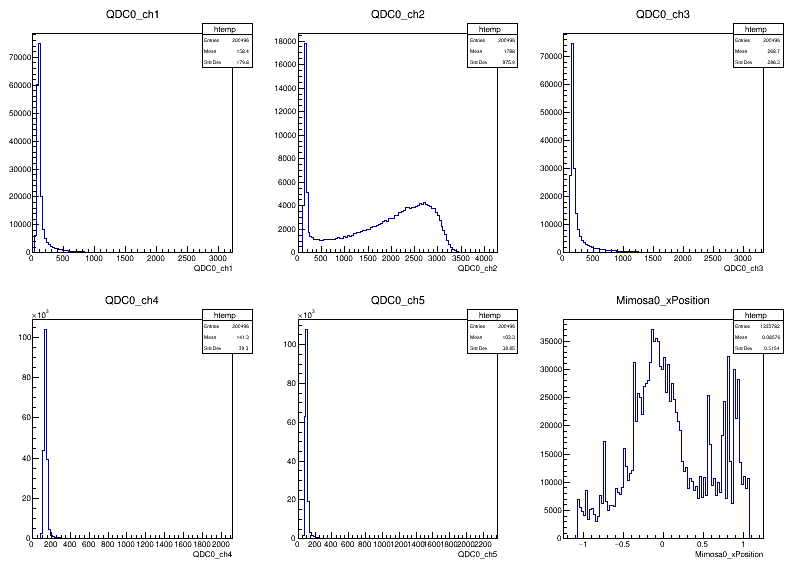

In [4]:
c = TCanvas('c', 'c', 800, 600)
c.Divide(3,2)
c.cd(1)
qdc1 = tfile.Get('RAWdata')
qdc1.Draw('QDC0_ch1')
c.cd(2)
qdc2 = tfile.Get('RAWdata')
qdc2.Draw('QDC0_ch2')
c.cd(3)
qdc3 = tfile.Get('RAWdata')
qdc3.Draw('QDC0_ch3')
c.cd(4)
qdc4 = tfile.Get('RAWdata')
qdc4.Draw('QDC0_ch4')
c.cd(5)
qdc5 = tfile.Get('RAWdata')
qdc5.Draw('QDC0_ch5')
c.cd(6)
qdc6 = tfile.Get('RECOdata')
qdc6.Draw('Mimosa0_xPosition')
c.Draw()

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.1.0'

In [7]:
tfile = TFile('/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572179299.root', 'READ')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


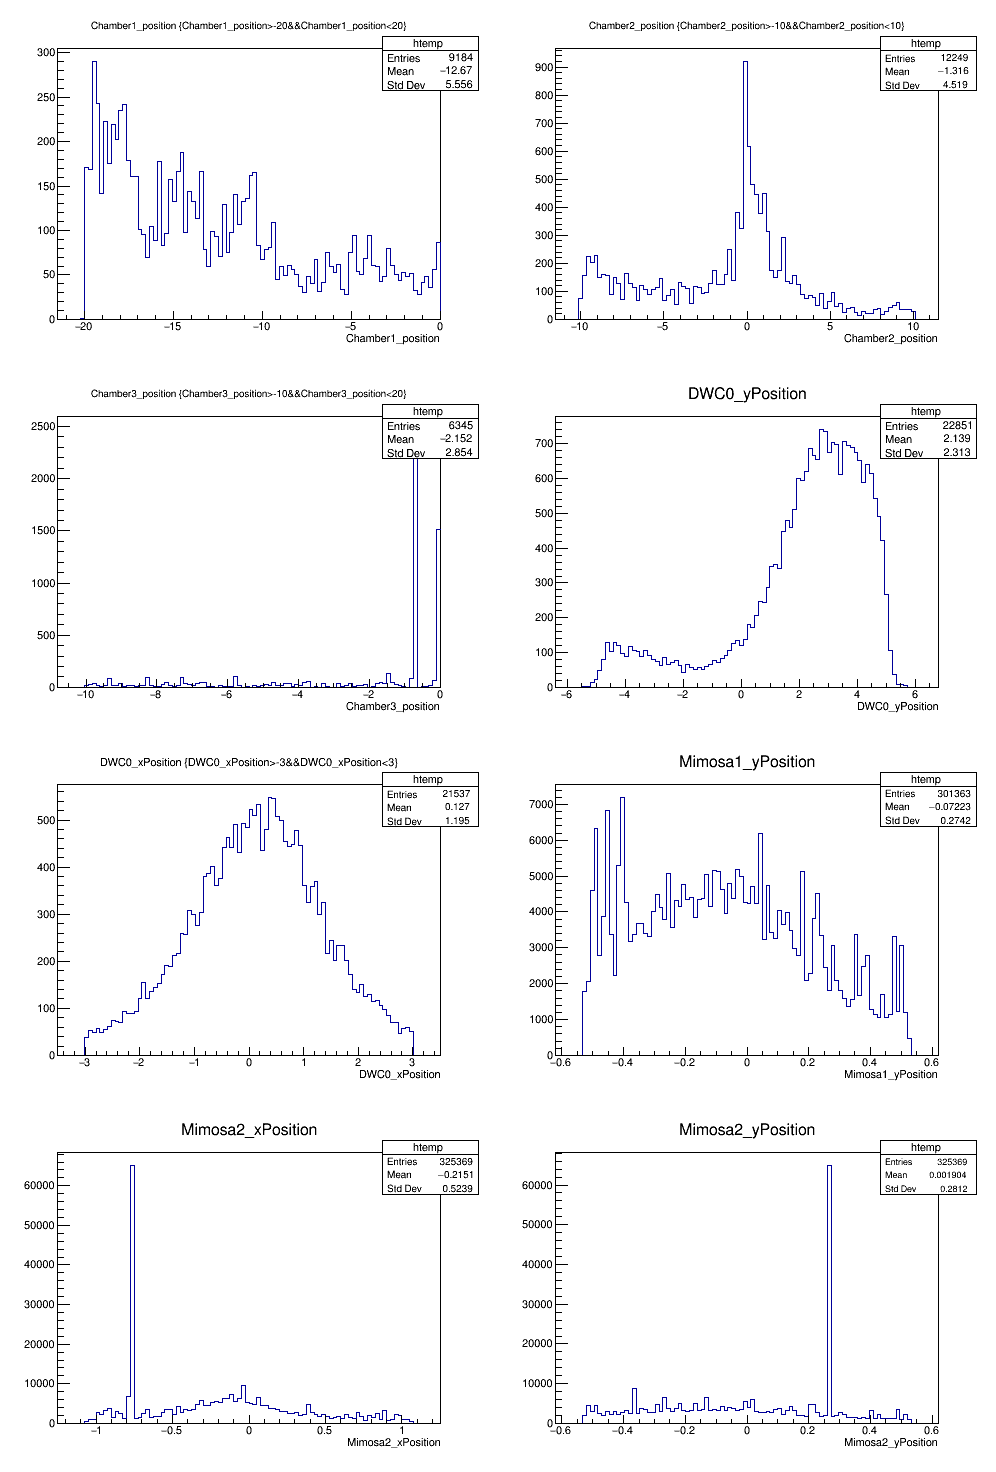

In [22]:
c = TCanvas('c', 'c', 1000, 1500)
c.Divide(2,4)
c.cd(1)
reco = tfile.Get('RECOdata')
#reco.Draw('Chamber1_position+10.02', 'Chamber1_position>-20&&Chamber1_position<0')
reco.Draw('Chamber1_position','Chamber1_position>-20&&Chamber1_position<20')
c.cd(2)
reco.Draw('Chamber2_position','Chamber2_position>-10&&Chamber2_position<10')
c.cd(3)
reco.Draw('Chamber3_position','Chamber3_position>-10&&Chamber3_position<20')
c.cd(4)
reco.Draw('DWC0_yPosition')
c.cd(5)
reco.Draw('DWC0_xPosition','DWC0_xPosition>-3&&DWC0_xPosition<3')
c.cd(6)
reco.Draw('Mimosa1_yPosition')
c.cd(7)
reco.Draw('Mimosa2_xPosition')
c.cd(8)
reco.Draw('Mimosa2_yPosition')


c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


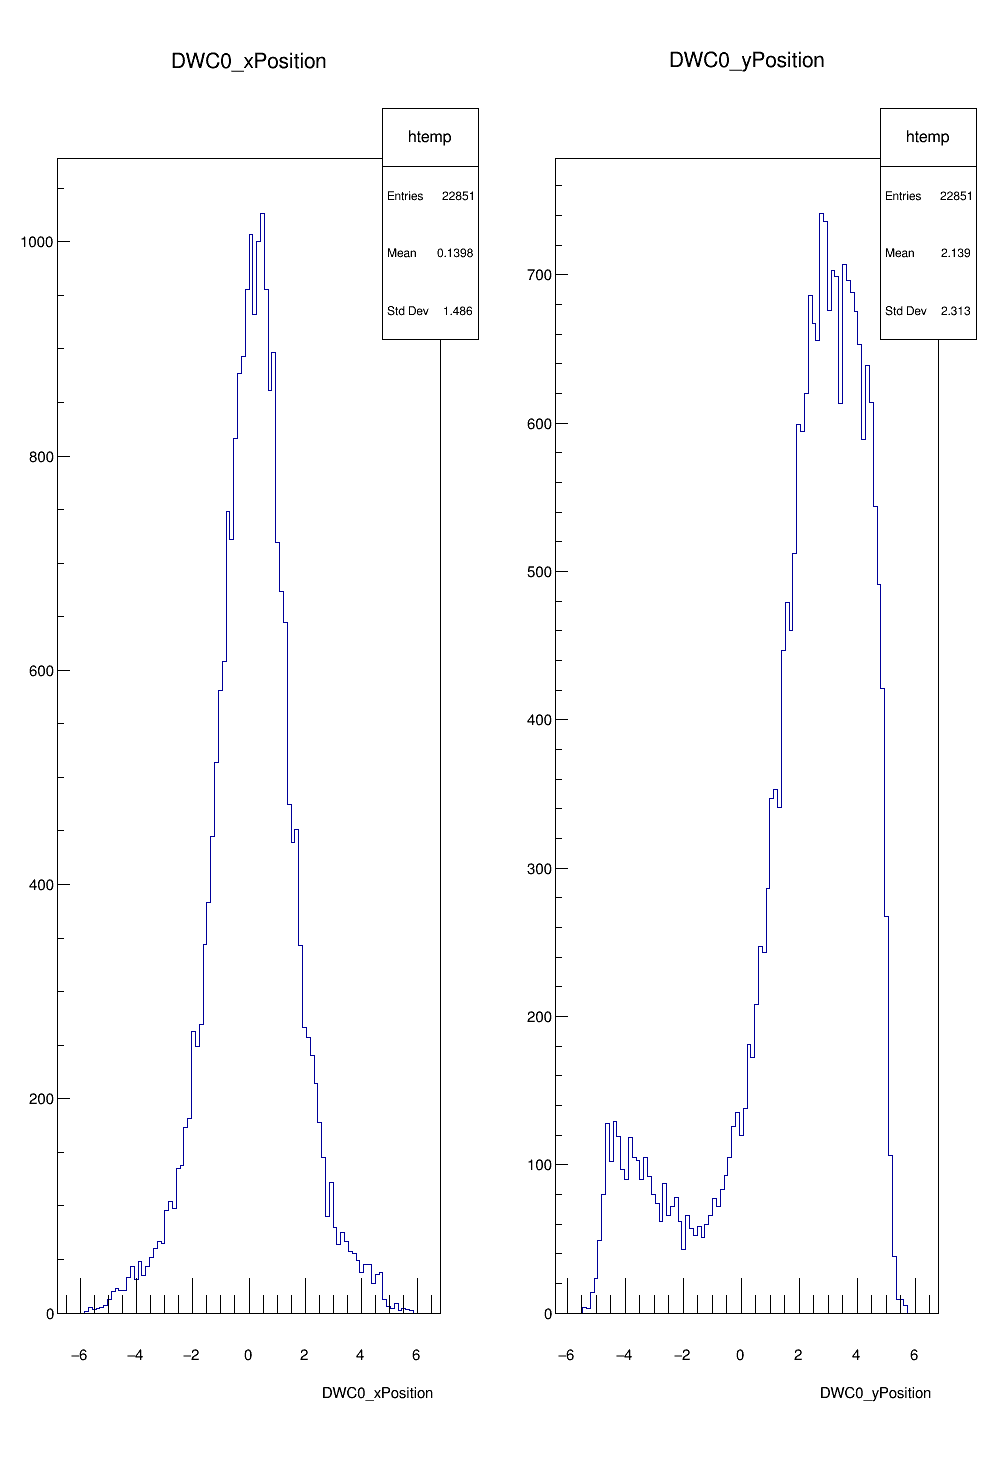

In [30]:
c = TCanvas('c', 'c', 1000, 1500)
c.Divide(2,1)
c.cd(1)
reco = tfile.Get('RECOdata')
reco.Draw('DWC0_xPosition')
c.cd(2)
reco.Draw('DWC0_yPosition')


c.Draw()

1. Regularize scintillator values based on voltage
2. Store MPV of scintillator hist
3. Add offsets to mimosas
4. 

In [6]:
from ROOT import TH1F, kBlue
h1 = TH1F("h1", ("Two gaussian plots and their ratio; x title; h1 and h2"
                 " histograms"), 100, -5, 5)
tfile = TFile('/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572179299.root', 'READ')
ttree = tfile.Get('RECOdata')
ttree.Draw('Chamber2_position>>h1')
c = TCanvas('c', 'c', 800, 800)
h1.Draw()
c.Draw()


AttributeError: 'CPyCppyy_NoneType' object has no attribute 'Draw'

Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [15]:
h1.GetMean()

0.008531662239928458

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Error in <TTreeFormula::Compile>:  Bad numerical expression : "goff"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {Mimosa0_xPosition,goff}


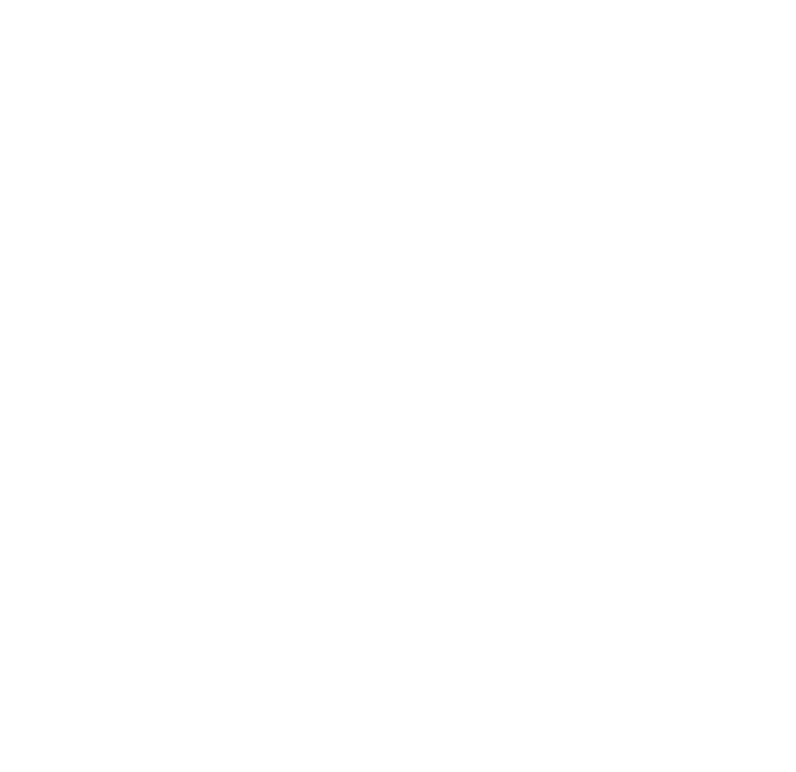

In [36]:
from ROOT import gDirectory
c = TCanvas('c', 'c', 800, 800)
tfile = TFile('/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572180849.root', 'READ')
ttree = tfile.Get('RECOdata')
ttree.Draw('Mimosa0_xPosition>>histo', 'goff')
c.Draw()
histo = gDirectory.Get("histo");

In [35]:
histo.GetMean()

0.09261811538326055